In [18]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Input Data Pre-processing 
x_train = x_train / 255.0

In [4]:
# Output Data Processing 
y_train = tf.keras.utils.to_categorical(y_train)

In [36]:
# del model

In [37]:
# Build the model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation= tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=16, activation= tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 16)                2064      
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=["acc"])

In [40]:
np.ceil(54_000 / 64)

844.0

In [41]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size=32, 
                          validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7728 - acc: 0.7814 - val_loss: 0.3154 - val_acc: 0.9125
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3369 - acc: 0.9046 - val_loss: 0.2503 - val_acc: 0.9302
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2751 - acc: 0.9217 - val_loss: 0.2079 - val_acc: 0.9430
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2354 - acc: 0.9328 - val_loss: 0.1847 - val_acc: 0.9478
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2055 - acc: 0.9411 - val_loss: 0.1588 - val_acc: 0.9572
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1812 - acc: 0.9481 - val_loss: 0.1483 - val_acc: 0.9597
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1620 - acc: 0.9533 - val_loss: 0.1330 - val_acc: 0.9635
Epoch 8/10
1688/1688 [==============================] - 4s 3ms

In [42]:
model_history.history

{'acc': [0.7813518643379211,
  0.9045555591583252,
  0.9217407703399658,
  0.9328333139419556,
  0.9411481618881226,
  0.9480741024017334,
  0.9532592296600342,
  0.9574074149131775,
  0.9611851572990417,
  0.964555561542511],
 'loss': [0.7728441953659058,
  0.33686360716819763,
  0.27505266666412354,
  0.23540706932544708,
  0.20547105371952057,
  0.18120788037776947,
  0.16200955212116241,
  0.1469918191432953,
  0.13355213403701782,
  0.123328298330307],
 'val_acc': [0.9125000238418579,
  0.9301666617393494,
  0.9430000185966492,
  0.9478333592414856,
  0.9571666717529297,
  0.9596666693687439,
  0.9635000228881836,
  0.965666651725769,
  0.9695000052452087,
  0.9704999923706055],
 'val_loss': [0.3153666853904724,
  0.25032296776771545,
  0.20790934562683105,
  0.1847185492515564,
  0.15883459150791168,
  0.14834487438201904,
  0.13296829164028168,
  0.1218537986278534,
  0.11327194422483444,
  0.10989215970039368]}

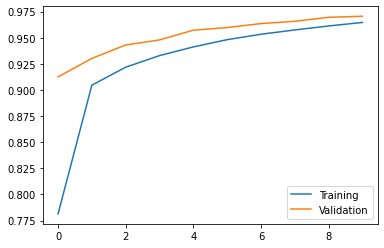

In [43]:
plt.plot(model_history.history.get("acc"), label="Training")
plt.plot(model_history.history.get("val_acc"), label="Validation")
plt.legend()
plt.show()

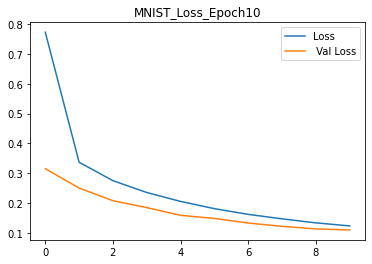

In [44]:
plt.title("MNIST_Loss_Epoch10")
plt.plot(model_history.history.get("loss"), label = "Loss")
plt.plot(model_history.history.get("val_loss"), label = " Val Loss")
plt.legend()
plt.show()

In [47]:
len(model.get_weights())

6

In [51]:
for i in model.get_weights():
  print(f"{i.shape}")

(784, 128)
(128,)
(128, 16)
(16,)
(16, 10)
(10,)


In [ ]:
# epoch, BS, VS, LR, Activation Func, Hidden Layer, Nuerons in Hidden Layer

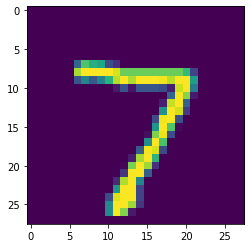

In [53]:
test_image = x_test[0]
plt.imshow(test_image)

In [54]:
test_image = test_image / 255.0

In [56]:
model.input_shape # (None, 28, 28) # (Number of images, Height, Width)

(None, 28, 28)

In [57]:
test_image.shape

(28, 28)

In [ ]:
# We want to convert this (28, 28) into (1, 28, 28) 

In [58]:
# How to introduce another dim ?? 
test_image1 = np.expand_dims(test_image, axis=0)

In [59]:
test_image1.shape

(1, 28, 28)

In [60]:
# MAGIC .... PREDICTION 
model.predict(test_image1)

array([[5.9127051e-05, 9.5868120e-07, 2.9588037e-04, 3.6846022e-03,
        7.2344557e-07, 2.3555413e-05, 2.5202876e-08, 9.9577051e-01,
        3.7034511e-05, 1.2754585e-04]], dtype=float32)

In [61]:
np.argmax(model.predict(test_image1))

7